In [3]:
import earthaccess
earthaccess.login()

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob

daily_data_file_path = "/Users/rippercus/Downloads/3B-DAY-L.MS.MRG.3IMERG.20250331-S000000-E235959.V07B.nc4.nc4"
ds = xr.open_dataset(daily_data_file_path)
print(ds)

<xarray.Dataset> Size: 117MB
Dimensions:                         (lat: 1800, lon: 3600, nv: 2, time: 1)
Coordinates:
  * lat                             (lat) float64 14kB -89.95 -89.85 ... 89.95
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * nv                              (nv) float32 8B 0.0 1.0
  * time                            (time) datetime64[ns] 8B 2025-03-31
Data variables:
    MWprecipitation                 (time, lon, lat) float32 26MB ...
    precipitation_cnt_cond          (time, lon, lat) int8 6MB ...
    precipitation                   (time, lon, lat) float32 26MB ...
    MWprecipitation_cnt             (time, lon, lat) int8 6MB ...
    MWprecipitation_cnt_cond        (time, lon, lat) int8 6MB ...
    probabilityLiquidPrecipitation  (time, lon, lat) int8 6MB ...
    randomError                     (time, lon, lat) float32 26MB ...
    randomError_cnt                 (time, lon, lat) int8 6MB ...
    time_bnds                       (

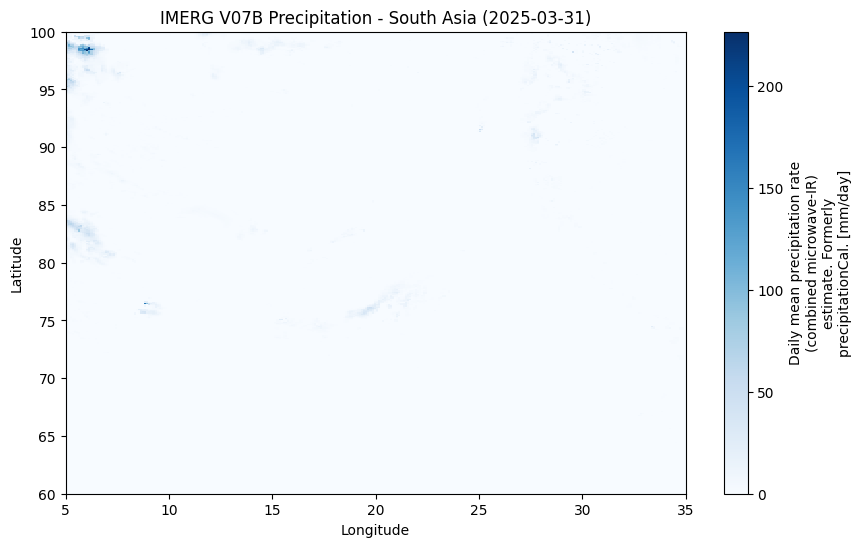

In [13]:
precip = ds["precipitation"]

south_asia = precip.sel(lat=slice(5, 35), lon=slice(60, 100))

precip_day = south_asia[0, :, :]

plt.figure(figsize=(10, 6))
precip_day.plot(cmap="Blues")
plt.title("IMERG V07B Precipitation - South Asia (2025-03-31)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [16]:
monthly_data_file_path = "/Users/rippercus/Downloads/3B-MO.MS.MRG.3IMERG.20240901-S000000-E235959.09.V07B.HDF5.nc4"

ds = xr.open_dataset(monthly_data_file_path)

print(ds)

<xarray.Dataset> Size: 130MB
Dimensions:                         (lat: 1800, latv: 2, lon: 3600, lonv: 2,
                                     nv: 2, time: 1)
Coordinates:
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
  * latv                            (latv) int32 8B 0 1
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lonv                            (lonv) int32 8B 0 1
  * nv                              (nv) int32 8B 0 1
  * time                            (time) object 8B 2024-09-01 00:00:00
Data variables:
    precipitationQualityIndex       (time, lon, lat) float32 26MB ...
    gaugeRelativeWeighting          (time, lon, lat) float32 26MB ...
    lat_bnds                        (lat, latv) float32 14kB ...
    precipitation                   (time, lon, lat) float32 26MB ...
    probabilityLiquidPrecipitation  (time, lon, lat) float32 26MB ...
    randomError                     (time, lon, lat) float32 26MB ...
 

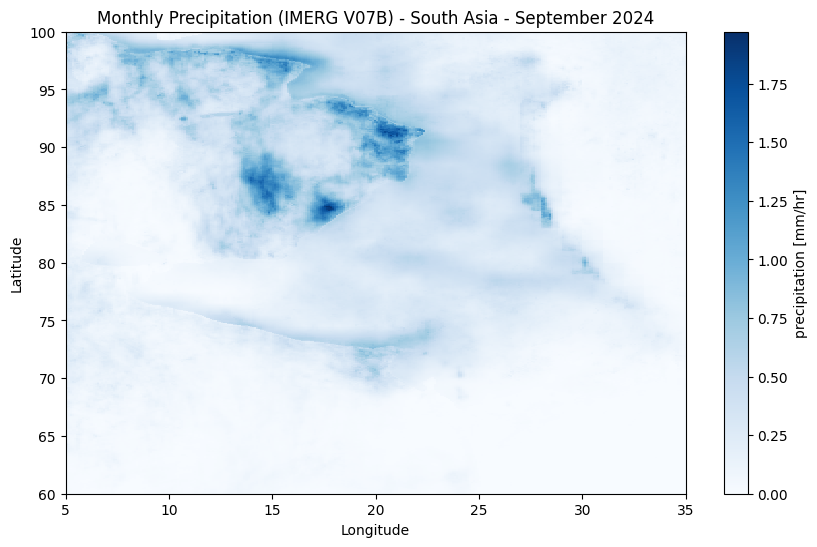

In [17]:
precip = ds["precipitation"]

south_asia = precip.sel(lat=slice(5, 35), lon=slice(60, 100))

plt.figure(figsize=(10, 6))
south_asia.plot(cmap="Blues")
plt.title("Monthly Precipitation (IMERG V07B) - South Asia - September 2024")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

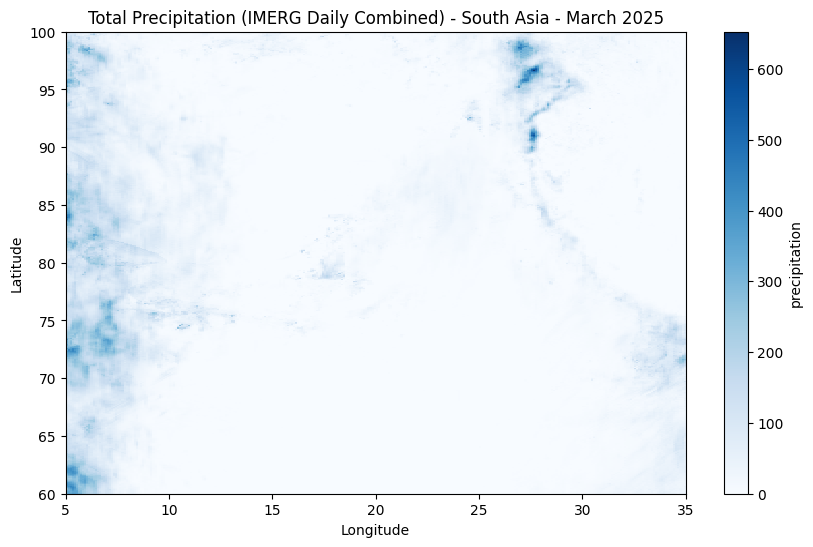

In [3]:
files = sorted(glob("/Users/rippercus/Downloads/March/3B-DAY-L*.nc4"))  

ds = xr.open_mfdataset(files, combine='by_coords')

precip = ds["precipitation"].sel(lat=slice(5, 35), lon=slice(60, 100))

monthly_avg = precip.mean(dim="time")

monthly_total = precip.sum(dim="time")

plt.figure(figsize=(10, 6))
monthly_total.plot(cmap="Blues")
plt.title("Total Precipitation (IMERG Daily Combined) - South Asia - March 2025")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()